In [1]:
# INDIR = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20"
# OUTDIR = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/results/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/clones_dendro"
# DONOR = 3
# COUNT_INDIR = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/donor3/mgatk"
# var_type = "mgatkdonor"

#INDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/"


# cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/cells_meta.tsv"
# outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/single/"

cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones/cells_meta.tsv"
outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones/top"

clone_order_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones/clones_ranked/cloneID_rank_ncells.txt"
ntop_clones = 10

#cloneID = "0_C6"

In [2]:
from os.path import join, exists, dirname
from glob import glob
import pickle
import mplh.cluster_help as ch
import mplh.fig_utils as fu

import os
import vireoSNP
import numpy as np
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
print(vireoSNP.__version__)

import pandas as pd
import seaborn as sns
from vireoSNP import Vireo
np.set_printoptions(formatter={'float': lambda x: format(x, '.5f')})


plt.rcParams['svg.fonttype'] = 'none'

fig_utils from mplh
0.5.6


In [3]:
import seaborn as sns
from mplh import cluster_help as ch

In [4]:
clone_order = pd.read_csv(clone_order_f, header=None)[0].values
# top_clones = clone_order[:ntop_clones]
# top_clones

In [6]:

cells_meta = pd.read_csv(cells_meta_f,sep="\t", index_col=0).fillna(0)
cells_meta

cells_clones = cells_meta.drop(["donor", "clusterID", "condition"], axis=1).copy()
cells_clones

cells_clones = cells_clones.loc[~(cells_clones == 0).all(axis=1)]

cells_meta = cells_meta.loc[cells_clones.index]

## Filter for clone

In [7]:
norm_condition = cells_meta.groupby("condition").size()
norm_condition

norm_lineage = cells_meta.groupby("clusterID").size()
norm_lineage

clusterID
0                 40
CLP               33
DC                41
MEP              220
MPP/CMP/GMP      706
MPP/CMP/GMP B    413
MPP/CMP/GMP C    510
MPP/CMP/GMP D    163
eosonophil       515
erythroid        804
macrophage       674
meg/erythroid    615
monocyte         179
neutrophil       829
neutrophil B     397
dtype: int64

## Remove donor-specific vars

In [8]:
cells_meta

,donor,clusterID,condition,cloneID_10397G,cloneID_10589A,cloneID_11761T,cloneID_13188T,cloneID_146C,cloneID_15297C,cloneID_15497A,...,cloneID_3847C,cloneID_5442C,cloneID_5581G,cloneID_58C,cloneID_64T,cloneID_7598A,cloneID_827G,cloneID_8292A,cloneID_8461T,cloneID_9899C
Control_AAACGAAAGAATCAGT-1,1,eosonophil,Control,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Control_AAACGAAAGTACAGTA-1,1,eosonophil,Control,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Control_AAACGAAAGTGTCGGA-1,1,erythroid,Control,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Control_AAACGAAGTCTTAGCA-1,1,erythroid,Control,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Control_AAACGAATCCCACGGA-1,1,MPP/CMP/GMP C,Control,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Input_TTTGTGTCAATGACTC-1,1,MPP/CMP/GMP,Input,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Input_TTTGTGTCAGAAAGAG-1,1,MPP/CMP/GMP B,Input,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Input_TTTGTGTCATAGCCAT-1,1,MPP/CMP/GMP B,Input,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Input_TTTGTGTGTCATAGAA-1,1,MPP/CMP/GMP,Input,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


number of donor vars: 0


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:709: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set_xlim(0, max_dependent_coord * 1.05)


ValueError: The number of observations cannot be determined on an empty distance matrix.

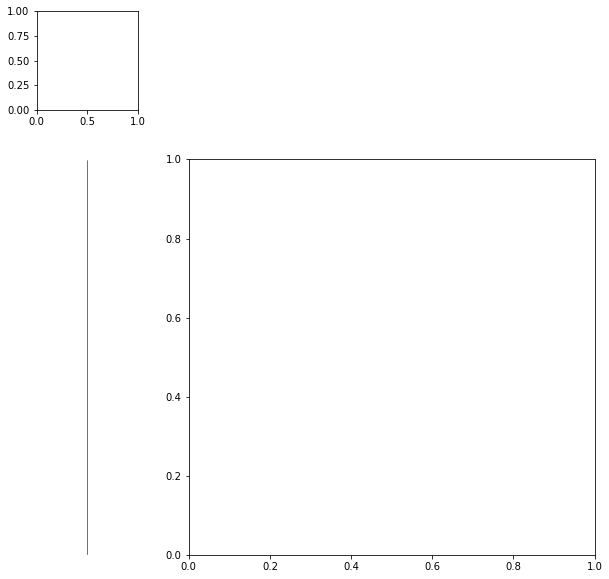

In [12]:
# def get_high_variants(df, thresh, pct_thresh):
#     """ Remove rows that have an average higher than threshold

#     :param df:
#     :param thresh:
#     :return:
#     """
#     n_pct = pct_thresh*df.shape[0]
#     return df.loc[:,((df>thresh).sum()>n_pct)].columns.values




# donor_vars = get_high_variants(cells_meta.drop(["donor", "clusterID", "condition"], axis=1), thresh=0, pct_thresh=0.8)
# donor_vars

# #donor_vars = get_high_variants(cells_meta, thresh=0.8, pct_thresh=0.9)
# print(f"number of donor vars: {len(donor_vars)}")

# g = sns.clustermap(cells_meta.drop(["donor", "clusterID", "condition"], axis=1).loc[:, donor_vars].sample(1000).astype(bool), metric="jaccard")
# #g.fig.savefig(fname=join(outdir, f"donor_variants.pdf"))


# # Remove Donor variannts
# #cells_meta = cells_meta.loc[:, ~(cells_meta.columns.isin(donor_vars))]
# #plt.savefig(join(outdir, "donor_vars.png"))

In [9]:
cells_meta

,donor,clusterID,condition,cloneID_10397G,cloneID_10589A,cloneID_11761T,cloneID_13188T,cloneID_146C,cloneID_15297C,cloneID_15497A,...,cloneID_3847C,cloneID_5442C,cloneID_5581G,cloneID_58C,cloneID_64T,cloneID_7598A,cloneID_827G,cloneID_8292A,cloneID_8461T,cloneID_9899C
Control_AAACGAAAGAATCAGT-1,1,eosonophil,Control,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Control_AAACGAAAGTACAGTA-1,1,eosonophil,Control,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Control_AAACGAAAGTGTCGGA-1,1,erythroid,Control,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Control_AAACGAAGTCTTAGCA-1,1,erythroid,Control,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Control_AAACGAATCCCACGGA-1,1,MPP/CMP/GMP C,Control,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Input_TTTGTGTCAATGACTC-1,1,MPP/CMP/GMP,Input,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Input_TTTGTGTCAGAAAGAG-1,1,MPP/CMP/GMP B,Input,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Input_TTTGTGTCATAGCCAT-1,1,MPP/CMP/GMP B,Input,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Input_TTTGTGTGTCATAGAA-1,1,MPP/CMP/GMP,Input,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
(cells_clones==0).all(axis=1).any()

False

In [15]:
(cells_clones==0).all(axis=1).any()

False

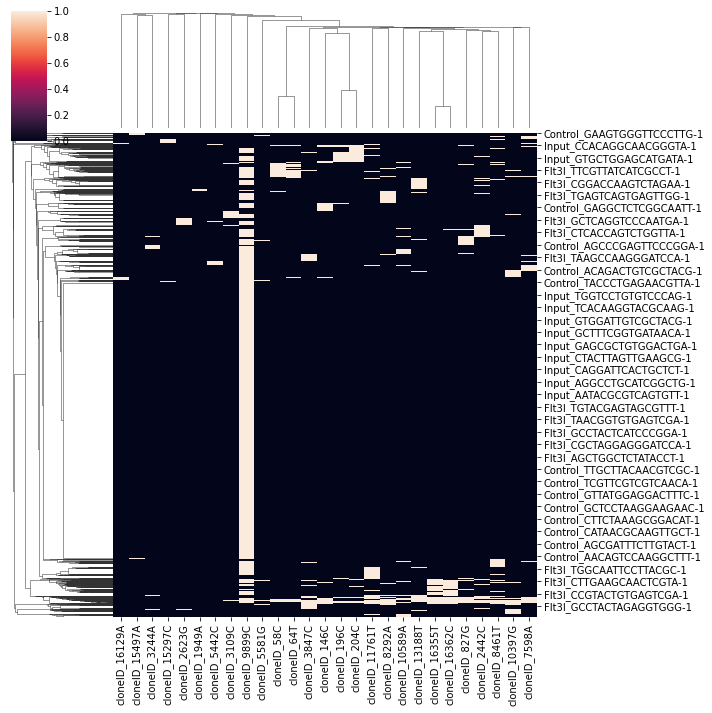

In [18]:
import sys
sys.setrecursionlimit(100000)
sns.clustermap(cells_clones.fillna(0), metric="jaccard")

In [19]:
#if "cloneID" not in cells_meta.columns:
# cell can have multiple entries if contains multiple variants
print("MT variants")
cells_meta.columns = [x.replace("cloneID_", "") for x in cells_meta.columns]
cells_meta_melt = cells_meta.reset_index().melt(id_vars=["index", "donor", "clusterID", "condition"], 
                                           value_name="inClust", var_name="cloneID")
cells_meta_melt = cells_meta_melt[cells_meta_melt["inClust"]==1]
top_cells_meta = cells_meta_melt.copy()
#     top_cells_meta = cells_meta_melt[cells_meta_melt["cloneID"].isin(top_clones)]
#     top_cells_meta
# else:
#     top_cells_meta = cells_meta[cells_meta["cloneID"].isin(top_clones)]
top_cells_meta

MT variants


,index,donor,clusterID,condition,cloneID,inClust
15,Control_AAAGATGCAGGCAGAT-1,1,eosonophil,Control,10397G,1.0
35,Control_AAATGCCTCTGATCCC-1,1,neutrophil,Control,10397G,1.0
56,Control_AACCTTTGTGGCATAG-1,1,eosonophil,Control,10397G,1.0
74,Control_AACTGGTGTCTGATTG-1,1,meg/erythroid,Control,10397G,1.0
127,Control_ACAAACCAGGTACACG-1,1,macrophage,Control,10397G,1.0
...,...,...,...,...,...,...
165748,Input_TTTGTGTCAATGACTC-1,1,MPP/CMP/GMP,Input,9899C,1.0
165749,Input_TTTGTGTCAGAAAGAG-1,1,MPP/CMP/GMP B,Input,9899C,1.0
165750,Input_TTTGTGTCATAGCCAT-1,1,MPP/CMP/GMP B,Input,9899C,1.0
165751,Input_TTTGTGTGTCATAGAA-1,1,MPP/CMP/GMP,Input,9899C,1.0


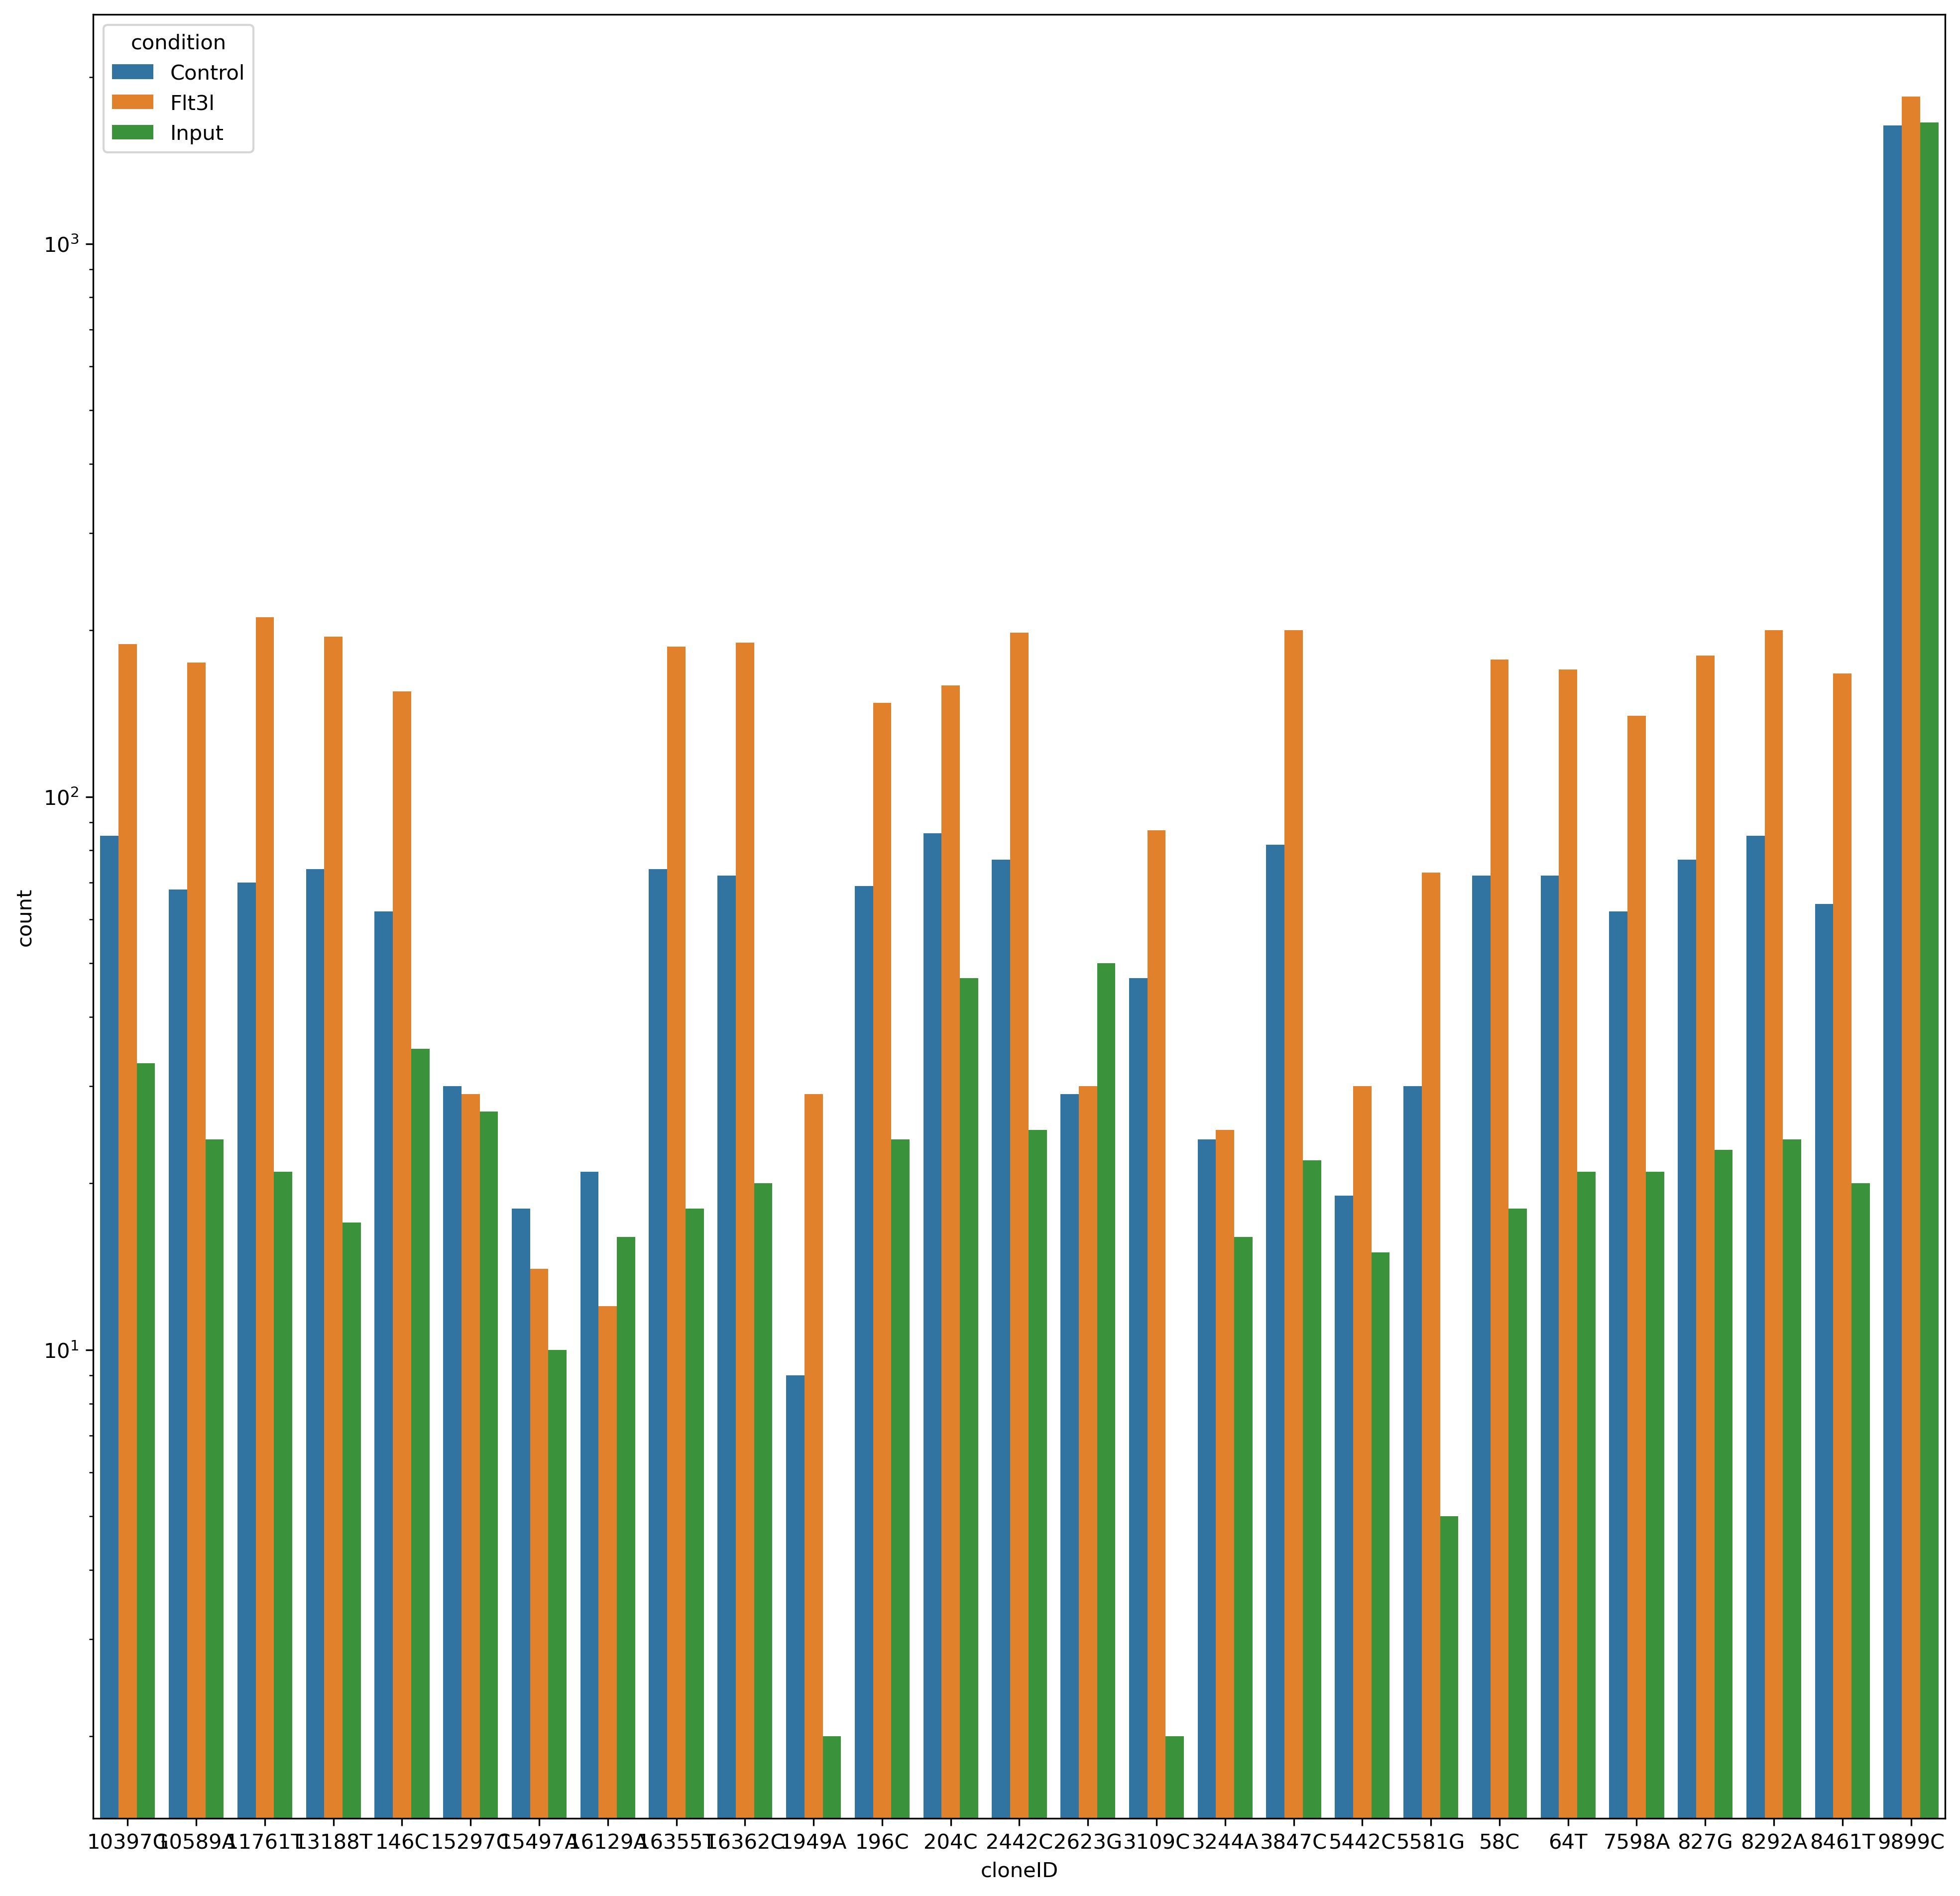

In [20]:
f, ax = plt.subplots(figsize=(16,16), dpi=300)
g = sns.countplot(data=top_cells_meta, x="cloneID", hue="condition")
g.set_yscale("log")


In [21]:
def plot_bar(data, **kwargs):
    f_df = data.pivot(index="clusterID", columns="condition", values=0).fillna(0)
    #print(f_df.head())
    f_df.plot.bar(stacked=True, ax=plt.gca())
    return

def plot_bar_log2(data, **kwargs):
    f_df = data.pivot(index="clusterID", columns="condition", values='l2').fillna(0)
    #print(f_df.head())
    f_df.plot.bar(stacked=True, ax=plt.gca())
    plt.gca().set_ylabel("Log2 counts")
    return


In [22]:
curr_cells_group = top_cells_meta.groupby(["clusterID", "cloneID", "condition"]).size().reset_index()
curr_cells_group['l2'] = np.log2(curr_cells_group[0])
kept_vars = curr_cells_group["cloneID"].unique()
kept_vars

clone_plot_order = []
for i in clone_order:
    if i in kept_vars:
        clone_plot_order.append(i)

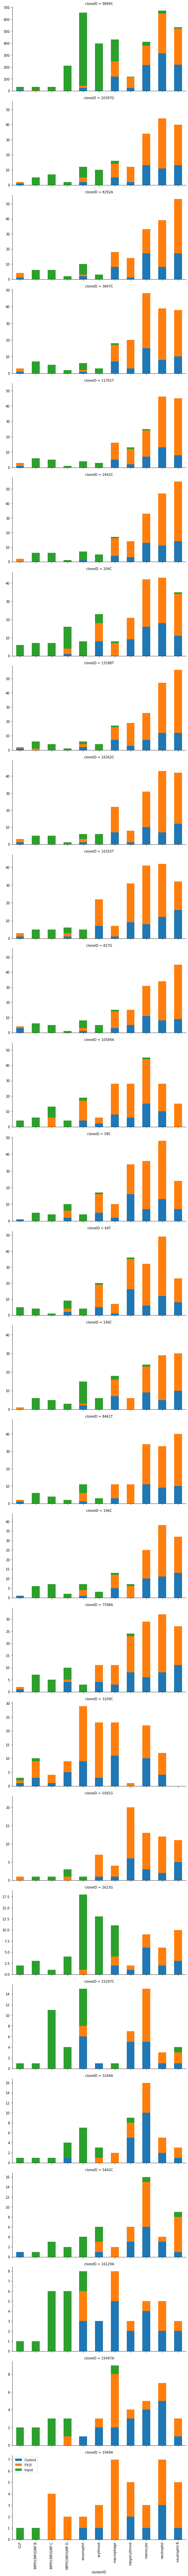

In [23]:

g = sns.FacetGrid(data=curr_cells_group, col="cloneID", col_order=clone_plot_order, sharey=False,
                  col_wrap=1, height=4, aspect=2)

g.map_dataframe(plot_bar, axis=1)

#              height=4*top_clones, width=2*4*top_clones
#.pivot(index="clusterID", columns="condition", values=0).fillna(0)
# curr_cells_group.plot.bar(stacked=True, ax=ax)
plt.legend(loc='best')
g.fig.savefig(fname=join(outdir, f"top_cluster_condition_ncells.svg"), dpi=500, bbox_inches='tight', pad_inches=0.5)
#g.fig.savefig(fname=join(outdir, f"top_cluster_condition_ncells.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)


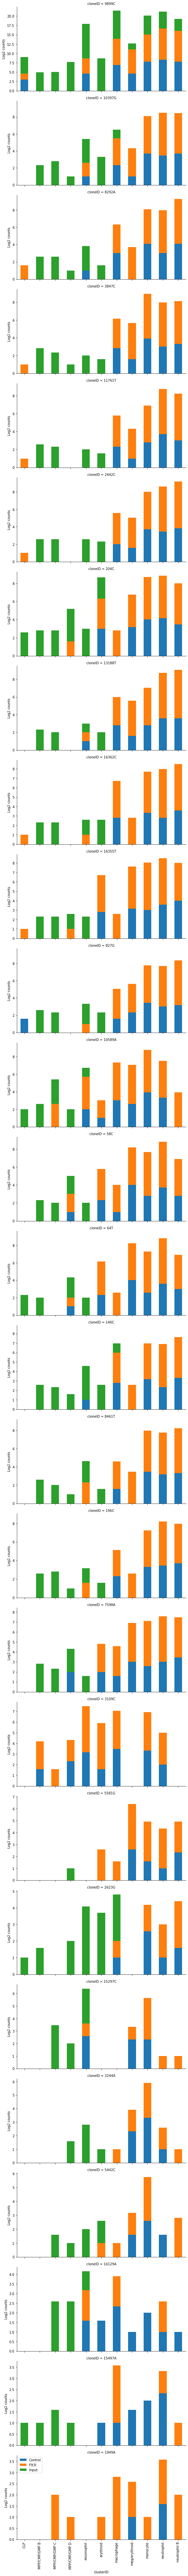

In [24]:

g = sns.FacetGrid(data=curr_cells_group, col="cloneID", col_order=clone_plot_order, sharey=False,
                  col_wrap=1, height=4, aspect=2)

g.map_dataframe(plot_bar_log2, axis=1)

#              height=4*top_clones, width=2*4*top_clones
#.pivot(index="clusterID", columns="condition", values=0).fillna(0)
# curr_cells_group.plot.bar(stacked=True, ax=ax)
plt.legend(loc='best')
g.fig.savefig(fname=join(outdir, f"top_cluster_condition_log2_ncells.svg"), dpi=500, bbox_inches='tight', pad_inches=0.5)
#g.fig.savefig(fname=join(outdir, f"top_cluster_condition_ncells.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)


In [25]:
print(outdir)

/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones/top


In [ ]:
# for clone_id, curr_cells in cells_meta.groupby("cloneID"):
#     print(clone_id)

#     curr_dir = join(outdir, f"cloneID_{clone_id}")
#     if not exists(curr_dir):
#         os.mkdir(curr_dir)
        
#     f, ax = plt.subplots(figsize=(12,12), dpi=300)

#     curr_cells_group = curr_cells.groupby(["clusterID", "condition"]).size().reset_index().pivot(index="clusterID", columns="condition", values=0).fillna(0)
#     curr_cells_group.plot.bar(stacked=True, ax=ax)
#     plt.savefig(join(curr_dir, "cluster_condition_ncells.pdf"))
#     f, ax = plt.subplots(figsize=(12,12), dpi=300)
#     curr_cells_group_norm = curr_cells_group.apply(lambda x: x/norm_condition.loc[x.name], axis=0)
#     curr_cells_group_norm.plot.bar(stacked=True, ax=ax)
#     plt.savefig(join(curr_dir, "cluster_condition_ncells_norm.pdf"))
    
#     f, ax = plt.subplots(figsize=(12,12), dpi=300)
#     curr_cells_lineage_group = curr_cells.groupby(["clusterID", "condition"]).size().reset_index().pivot(columns="clusterID", index="condition", values=0).fillna(0)
#     curr_cells_group_norm = curr_cells_lineage_group.apply(lambda x: x/norm_lineage.loc[x.name], axis=0)
#     curr_cells_lineage_group.plot.bar(stacked=True, ax=ax)
#     plt.savefig(join(curr_dir, "cluster_lineage_splitCondition_ncells_norm.pdf"))
#     plt.close('all')